Hi everyone, this  is my first notebook. This notebook is about the price prediction of Used cars. Hopefully you will like this notebook.<br>The dataset have 46023 rows and 16 columns which includes name, price, location, mileage, trasnmission etc. <br> I divide this project into following steps:
* Step 1: Reading and Understanding the Data
* Step 2 : Data Cleaning and Preparation
* Step 3: Visualizing the data
* Outliers
* Feature Selcetion
* Feature Scaling
* Train-Test Split
* Building Model
* Results

### Importing Libraries

In [1]:
#Data Wrangling 
import pandas as pd
import numpy as np
from collections import Counter
from collections import OrderedDict

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error

#Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

### <font color = green> Step 1: Reading and Understanding the Data </font>

In [2]:
#importing the dataset
cars = pd.read_csv('../input/car-price-dataset/updated_pakwheels.csv')

In [3]:
#looking the first 5 rows of data
cars.head()

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,4096758,Toyota Vitz F 1.0 2017,2385000,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,1,1000,1,Silver,Imported,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",11-Jul-20,https://www.pakwheels.com/used-cars/toyota-vit...
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000,2019,Peshawar KPK,11111,Islamabad,1,1300,1,White,Local,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...
2,4168298,Suzuki Alto VXL 2019,1530000,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,1,660,1,White,Local,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...
3,4168307,Suzuki Alto VXR 2019,1650000,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,1,660,2,White,Local,1,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",12-Jul-20,https://www.pakwheels.com/used-cars/suzuki-alt...
4,4168306,Toyota Corolla XLi VVTi 2010,1435000,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,1,1300,2,Black,Local,2,"AM/FM Radio, Air Conditioning, CD Player, Key...",12-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...


In [4]:
#Shape of data set
cars.shape

(46023, 16)

In [5]:
print(f'This DataSet Contains {cars.shape[0]} rows & {cars.shape[1]} columns.')

This DataSet Contains 46023 rows & 16 columns.


In [6]:
#Summary statistics of the numerical columns in the dataset
cars.describe()

,Ad No,Price,Model Year,Mileage,Engine Type,Engine Capacity,Transmission,Body Type
count,4.602300e+04,4.602300e+04,46023.00000,46023.000000,46023.000000,46023.000000,46023.000000,46023.000000
mean,4.070389e+06,2.014144e+06,2011.03533,90964.107772,1.084110,1313.115290,1.534776,1.772331
std,1.680335e+05,2.939040e+06,6.39934,63656.340890,0.373594,614.684157,0.498795,1.022013
min,1.338100e+04,1.110000e+05,1990.00000,1.000000,1.000000,16.000000,1.000000,1.000000
25%,4.051758e+06,8.500000e+05,2007.00000,48891.500000,1.000000,1000.000000,1.000000,1.000000
50%,4.103354e+06,1.450000e+06,2013.00000,80000.000000,1.000000,1300.000000,2.000000,2.000000
75%,4.142396e+06,2.300000e+06,2016.00000,120000.000000,1.000000,1500.000000,2.000000,2.000000
max,4.168339e+06,7.750000e+07,2019.00000,999999.000000,3.000000,6600.000000,2.000000,6.000000


In [7]:
#Chceking if there any null values or not
cars.isnull().sum()

Ad No                 0
Name                  0
Price                 0
Model Year            0
Location              0
Mileage               0
Registered City       0
Engine Type           0
Engine Capacity       0
Transmission          0
Color                 0
Assembly              0
Body Type             0
Features           2521
Last Updated          0
URL                   0
dtype: int64



* Only Features column have 2521 null values

In [8]:
#data have no(0) duplicated values
cars.duplicated().sum()

0

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46023 entries, 0 to 46022
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ad No            46023 non-null  int64 
 1   Name             46023 non-null  object
 2   Price            46023 non-null  int64 
 3   Model Year       46023 non-null  int64 
 4   Location         46023 non-null  object
 5   Mileage          46023 non-null  int64 
 6   Registered City  46023 non-null  object
 7   Engine Type      46023 non-null  int64 
 8   Engine Capacity  46023 non-null  int64 
 9   Transmission     46023 non-null  int64 
 10  Color            46023 non-null  object
 11  Assembly         46023 non-null  object
 12  Body Type        46023 non-null  int64 
 13  Features         43502 non-null  object
 14  Last Updated     46023 non-null  object
 15  URL              46023 non-null  object
dtypes: int64(8), object(8)
memory usage: 5.6+ MB


In [10]:
# Creating Backup data
backup = cars.copy()

### <font color = green>Step 2 : Data Cleaning and Preparation </font>

* Dropping unnecessary columns

In [11]:
# Here, we will drop the columns - AD NO, Features, Last Updated, URL from the dataset.
cars.drop(columns = ['Ad No', 'Features', 'Last Updated', 'URL'], inplace = True)

In [12]:
cars.isnull().sum()

Name               0
Price              0
Model Year         0
Location           0
Mileage            0
Registered City    0
Engine Type        0
Engine Capacity    0
Transmission       0
Color              0
Assembly           0
Body Type          0
dtype: int64

In [13]:
cars['Name'].value_counts()

Honda Civic Oriel 1.8 i-VTEC CVT 2017    381
Suzuki Wagon R VXL 2018                  362
Suzuki Mehran VXR Euro II 2018           355
Honda Civic Oriel 1.8 i-VTEC CVT 2018    332
Suzuki Wagon R VXL 2019                  300
                                        ... 
Honda Freed G 2013                         1
Mitsubishi Pajero Mini VR 2008             1
Toyota Corolla Altis Manual 1.6 2015       1
Toyota Vitz B S Edition 1.0 2010           1
Toyota Prado TX Limited 3.4 2006           1
Name: Name, Length: 4826, dtype: int64

* Here, we can see that the column - Name have also Cars Company name and model name 

In [14]:
# spliting Companay name and Model name from Name column
company_name = cars['Name'].apply(lambda x: x.split(' ')[0])
cars.insert(1, 'Company Name', company_name)
model_name = cars['Name'].apply(lambda x: x.split(' ')[1])
cars.insert(2, 'Model Name', model_name)

In [15]:
# So now Name column is no more useful thats why droping Name column from dataset
cars.drop(columns = 'Name', inplace = True)

* Location column have irregular values like some have city,province some have Area,city

In [16]:
cars['Location'].value_counts()

 Lahore Punjab                        2101
 Islamabad Islamabad                  1753
 Karachi Sindh                        1534
 Rawalpindi Punjab                     995
 DHA Defence, Lahore Punjab            825
                                      ... 
 Chunian Main Road, Chunian Punjab       1
 Aziz Avenue , Lahore Punjab             1
 Saeedabad, Peshawar KPK                 1
 Janjua Town, Rawalpindi Punjab          1
 Shahpur Kanjra, Lahore Punjab           1
Name: Location, Length: 2068, dtype: int64

In [17]:
# Fetching only province from location column
cars['Location'] = cars['Location'].apply(lambda x: x.split(' ')[-1])

In [18]:
cars['Location'].value_counts()

Punjab         24732
Sindh           8758
Islamabad       6659
KPK             5283
Balochistan      324
Kashmir          248
Areas             18
                   1
Name: Location, dtype: int64

* here ill show why Areas is in location now

In [19]:
backup['Areas'] = backup['Location'].apply(lambda x: 1 if 'Areas' in x else 0 )

In [20]:
Areas = backup[backup['Areas'] == 1]
Areas.head()

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL,Areas
5822,4160230,Toyota Corolla GLi 1.3 VVTi 2012,1950000,2012,Hangu Federally Administered Tribal Areas,87000,Lahore,1,1300,2,White,Local,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",9-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,1
7654,4156983,Toyota Aqua S 2014,2350000,2014,Hangu Federally Administered Tribal Areas,85000,Islamabad,1,1500,1,Red,Imported,1,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",8-Jul-20,https://www.pakwheels.com/used-cars/toyota-aqu...,1
9209,4152867,Toyota Corolla 2.0D Limited 1996,680000,1996,Hangu Federally Administered Tribal Areas,120000,Lahore,1,1600,2,Black,Imported,2,"ABS, AM/FM Radio, Air Conditioning, CD Player...",6-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,1
10321,4150164,Toyota Corolla XLi VVTi 2014,1800000,2014,Hangu Federally Administered Tribal Areas,90000,Islamabad,1,1300,2,White,Local,2,"ABS, Air Bags, Air Conditioning, Alloy Rims, ...",5-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,1
12069,4145232,Toyota Corolla GLi 1.3 VVTi 2011,1750000,2011,Hangu Federally Administered Tribal Areas,138000,Islamabad,1,1300,2,Silver,Local,2,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",3-Jul-20,https://www.pakwheels.com/used-cars/toyota-cor...,1


In [21]:
Areas.shape[0]

18

* here we have now 18 entries which are (Hangu Federally Administered Tribal Areas) are located in KPK thats why replacing Areas to KPK

In [22]:
# Replacin Areas to KPK 
cars['Location'] = cars['Location'].str.replace('Areas', 'KPK')

cars.drop(index = 44816, inplace = True)

* Replacing the values of categorical columns - Enging type, Transmission and body type to its own data for better EDA.

In [23]:
# 1 for Petrol and 2 for Diesel and 3 for Hybrid
def Engine_type(val):
    rep = {
        1:"Petrol",
        2:'Diesel',
        3:'Hybrid'   
    }
    return rep[val]


# 1 for Automaric and 2 for Manual
def Trans(val):
    rep_ = {
        1: "Automatic",
        2: "Manual"
    }
    return rep_[val]


# 1 for Hatchback, 2 for Sedan, 3 for Suv, 4 for mini van, 5 for Crossover, and 6 for Van
def Body_type(val):
    rep = {
        1:"Hatchback",
        2:"Sedan",
        3:'SUV',
        4:'Mini Van',
        5:'Cross Over',
        6:'Van'
    }
    return rep[val]

In [24]:
# Applying the Functions
cars['Transmission Type'] = cars['Transmission'].apply(Trans)
cars['Engine Type'] = cars['Engine Type'].apply(Engine_type)
cars['Body Type'] = cars['Body Type'].apply(Body_type)

In [25]:
cars.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Transmission Type
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Un-Registered,Petrol,1000,1,Silver,Imported,Hatchback,Automatic
1,Toyota,Corolla,111000,2019,KPK,11111,Islamabad,Petrol,1300,1,White,Local,Sedan,Automatic
2,Suzuki,Alto,1530000,2019,KPK,17500,Un-Registered,Petrol,660,1,White,Local,Hatchback,Automatic
3,Suzuki,Alto,1650000,2019,Punjab,9600,Lahore,Petrol,660,2,White,Local,Hatchback,Manual
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Islamabad,Petrol,1300,2,Black,Local,Sedan,Manual


In [26]:
a = cars['Registered City'].value_counts().head(10)
a

Lahore           17116
Islamabad        10690
Karachi          10113
Un-Registered     3329
Rawalpindi        1077
Multan            1002
Faisalabad         608
Peshawar           501
Sialkot            210
Bahawalpur         178
Name: Registered City, dtype: int64

In [27]:
def get_reg(val):
    if val != 'Un-Registered':
        return 'Registered'
    else:
        return val

In [28]:
cars['Registration Status'] = cars['Registered City'].apply(get_reg)

In [29]:
# Droping useless columns - Registerd city & Transmission
cars.drop(columns = ['Registered City', 'Transmission'], inplace = True)

In [30]:
# There is still some numeric values is model name 
numeric_drop = cars[(cars['Model Name'].str.isnumeric())].index
numeric_drop

Int64Index([  586,   633,   635,  2046,  2479,  2777,  2947,  3837,  4393,
             4673,
            ...
            44368, 44382, 44525, 44554, 44634, 44821, 44873, 45005, 45864,
            46003],
           dtype='int64', length=112)

In [31]:
#Droping the numeric values in Model name column
print("Before: {} rows".format(len(cars)))
cars = cars.drop(numeric_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(cars)))

Before: 46022 rows
After: 45910 rows


In [32]:
cars.head()

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,Islamabad,9869,Petrol,1000,Silver,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,KPK,11111,Petrol,1300,White,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,KPK,17500,Petrol,660,White,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,Punjab,9600,Petrol,660,White,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,Islamabad,120000,Petrol,1300,Black,Local,Sedan,Manual,Registered


* This the final data after cleaning 
* Now Lets visualize the data and lets see which have high correletaion with Target column - Price

### <font color = green>Step 3: Visualizing the data</font>

### <font color = blue> 3.1 :Feature Analysis on Categorical Column</font>

##### 3.1.1 Company Column

In [33]:
# Printing NUmbers of Cars Companies
comp_unique = cars['Company Name'].nunique()
print(f'There are totals {comp_unique} cars companies in dataset')

There are totals 31 cars companies in dataset


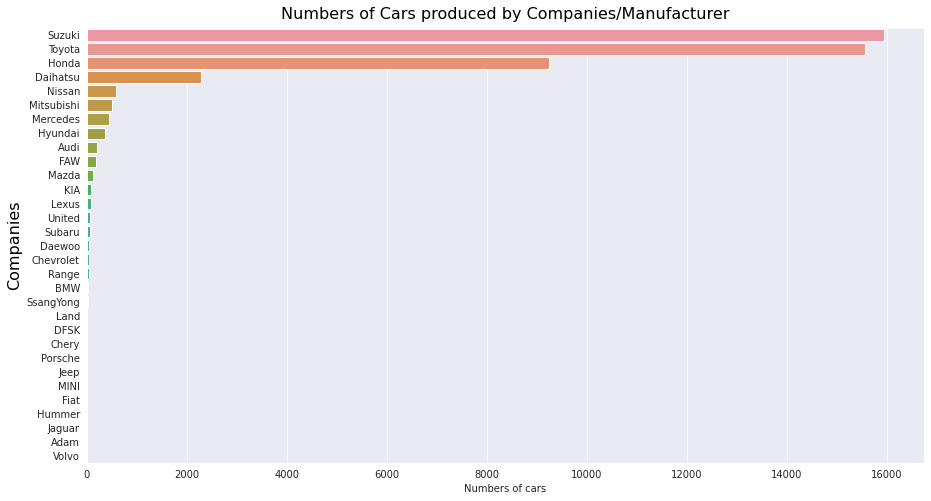

In [34]:
#Plotting Graph
comp_count = cars['Company Name'].value_counts()
comp_name = comp_count.index
comp_val = comp_count.values
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
plt.figure(figsize = (15, 8))
sns.set_style("darkgrid")
plot = sns.barplot(y=comp_name,x=comp_val)
plot=plt.setp(plot.get_xticklabels(), rotation=0)
plt.xlabel('Numbers of cars')
plt.ylabel('Companies', **title_font)
plt.title('Numbers of Cars produced by Companies/Manufacturer', **title_font)
plt.show()

* From above graph, we can see that the Manufacture  Company - Suzuki & Toyota have the most cars in the dataset

#### Company Vs Price

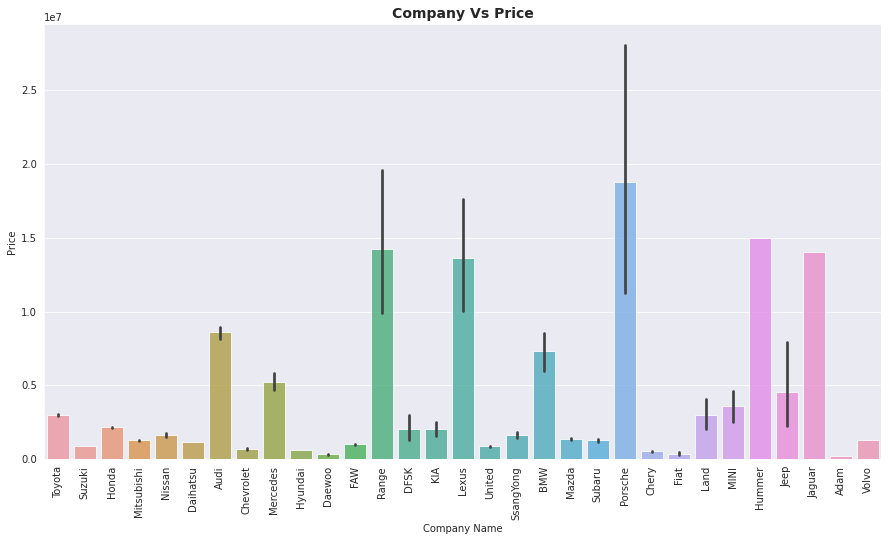

In [35]:
font = {'weight' : 'bold',
        'size'   : 14}
plt.figure(figsize = (15, 8))
plot = sns.barplot(x = 'Company Name', y = 'Price', data = cars, alpha = 0.8)
plot=plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Company Vs Price', **font)
plt.show()

#### Inference :
* Porsche, Hummer seem to have highest  price.

### 3.1.2. Category - Cars Model 

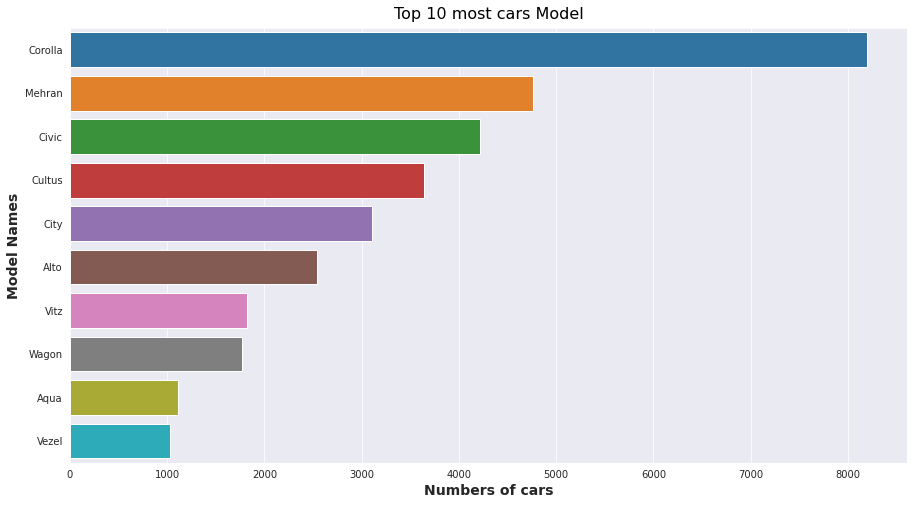

In [36]:
mdoel_count = cars['Model Name'].value_counts()
mdoel_name = mdoel_count.index[0:10]
mdoel_val = mdoel_count.values[0:10]
title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
plt.figure(figsize = (15, 8))
sns.set_style("darkgrid")
plot = sns.barplot(y=mdoel_name,x=mdoel_val)
plot=plt.setp(plot.get_xticklabels(), rotation=0)
plt.xlabel('Numbers of cars', **font)
plt.ylabel('Model Names', **font)
plt.title('Top 10 most cars Model', **title_font)
plt.show()

* most cars models are corolla

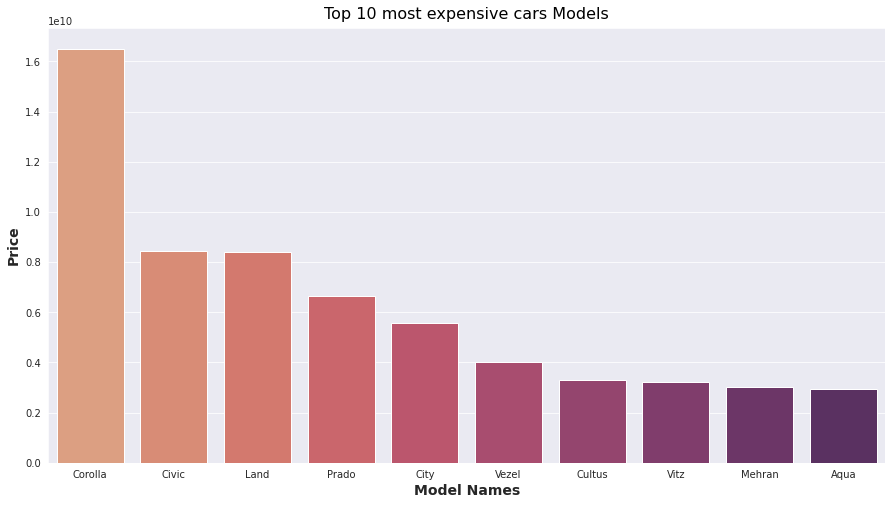

In [37]:
top10_model = cars[['Model Name', 'Price']].groupby(['Model Name']).sum().nlargest(n = 10, columns = ['Price'])
top10_model_name = top10_model['Price'].index
top10_model_values = top10_model['Price'].values
plt.figure(figsize = (15, 8))
sns.barplot(x = top10_model_name, y=top10_model_values, palette = 'flare')
plt.xlabel('Model Names', **font)
plt.ylabel('Price', **font)
plt.title('Top 10 most expensive cars Models', **title_font)
plt.show()

### 3.1.3. Category - Engine Type 


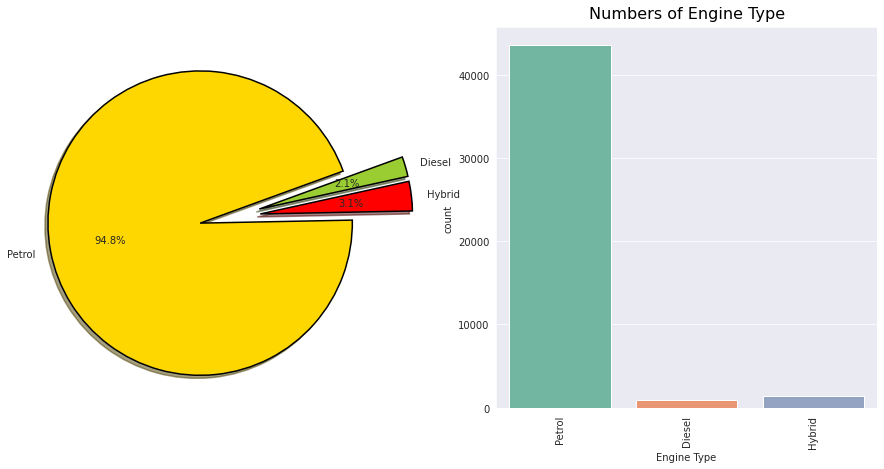

In [38]:
# pie plot showing the Distribution of engine type
fig, axes = plt.subplots(1,2, figsize=(15,7))
colors  = ('gold', 'red', 'yellowgreen')
wp = {'linewidth': 1.5, 'edgecolor': 'black'}
explode = (0.2, 0.2, 0.2)
et = cars['Engine Type'].value_counts()
et.plot(kind = 'pie', shadow = True, autopct = '%1.1f%%', colors = colors, wedgeprops = wp, startangle = 20, label = '', 
        explode = explode, ax = axes[0])


# count plot showing the numbers of engine type
plot = sns.countplot(x = 'Engine Type', data = cars, ax = axes[1], palette = "Set2")
plot=plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Numbers of Engine Type', **title_font)
plt.show()


* From above graph, we can see that the cars with Engine Type - Petrol are the most in the dataset.

#### 3.1.3.1. Engine Type Vs Price

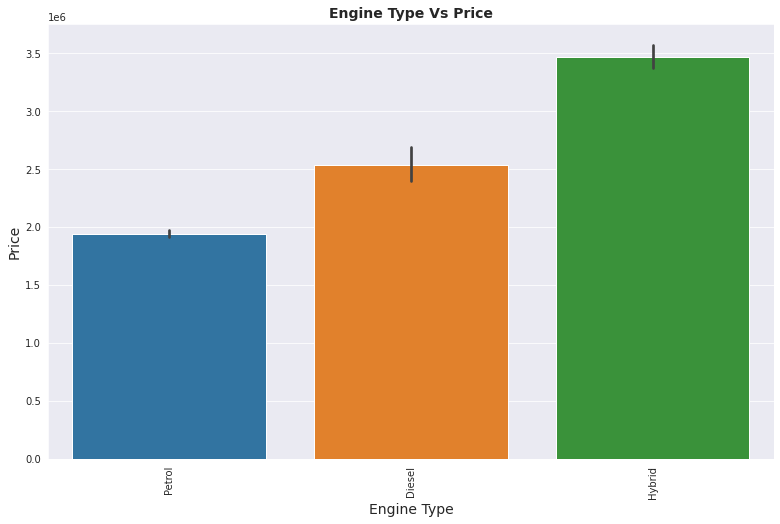

In [39]:

plt.figure(figsize = (13, 8))
plot = sns.barplot(x = 'Engine Type', y = 'Price', data = cars)
plot=plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Engine Type Vs Price', **font)
plt.xlabel('Engine Type', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

#### Inference :
* From above graph, we can see that cars with engine type Hybrid seem to have highest  price.

### 3.1.4.  Category - Assembly

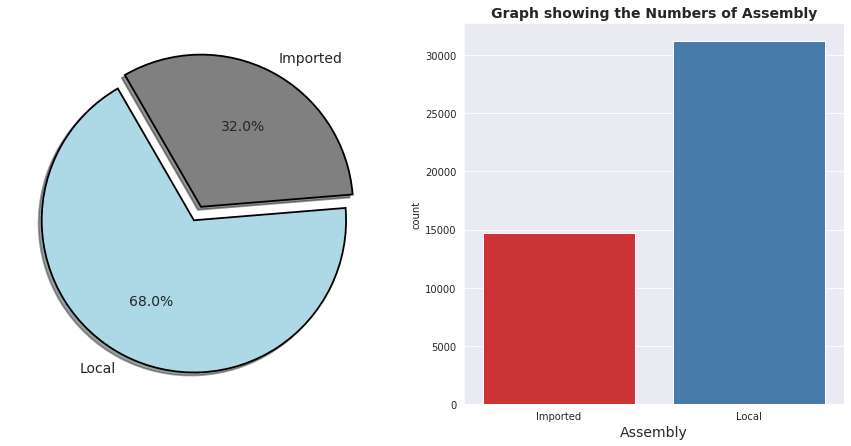

In [40]:
# pie plot showing the Distribution of Assembly
fig, axes = plt.subplots(1,2, figsize=(15,7))
colors  = ('lightblue', 'gray')
wp = {'linewidth': 1.8, 'edgecolor': 'black'}
explode = (0.05, 0.05)
et = cars['Assembly'].value_counts()
et.plot(kind = 'pie', shadow = True, autopct = '%1.1f%%', colors = colors, wedgeprops = wp, startangle = 120, label = '', 
        explode = explode, fontsize = 14, ax = axes[0])


# count plot showing the numbers of Assembly
ax = sns.countplot(x = 'Assembly', data = cars, ax = axes[1], palette = "Set1")
plot=plt.setp(ax.get_xticklabels(), rotation=0)
plt.xlabel('Assembly', fontsize = 14)
plt.title('Graph showing the Numbers of Assembly', **font)
plt.show()

* From the above graph, we can see that most of the cars locals.



#### 3.1.4.1. Assembly Vs Price

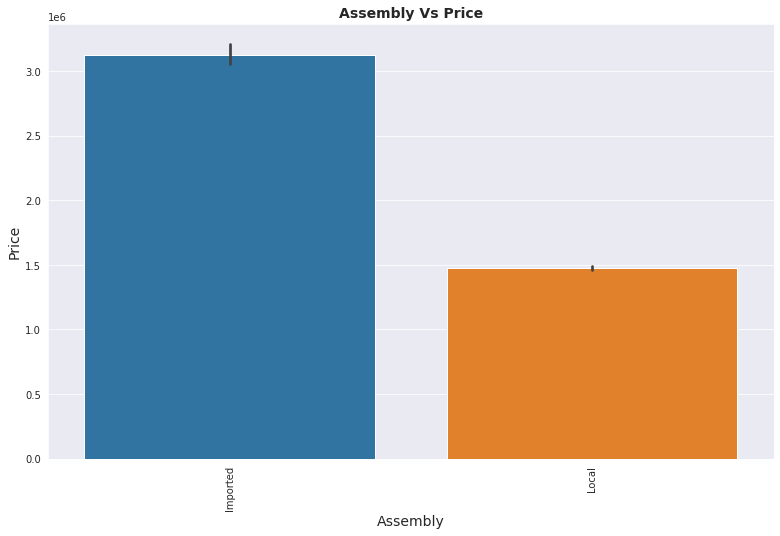

In [41]:
plt.figure(figsize = (13, 8))
ax = sns.barplot(x = 'Assembly', y = 'Price', data = cars)
plot=plt.setp(ax.get_xticklabels(), rotation=90)
plt.title('Assembly Vs Price', **font)
plt.xlabel('Assembly', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

* From above graph, we can see that the imported Cars have higher price than Locals Cars.

### 3.1.5. Category - Body Type

In [42]:
# Printing nmbers of Cars Body type
body_nunique = cars['Body Type'].nunique()
print(f'There are totals {body_nunique} different Body Types cars in dataset.')

There are totals 6 different Body Types cars in dataset.


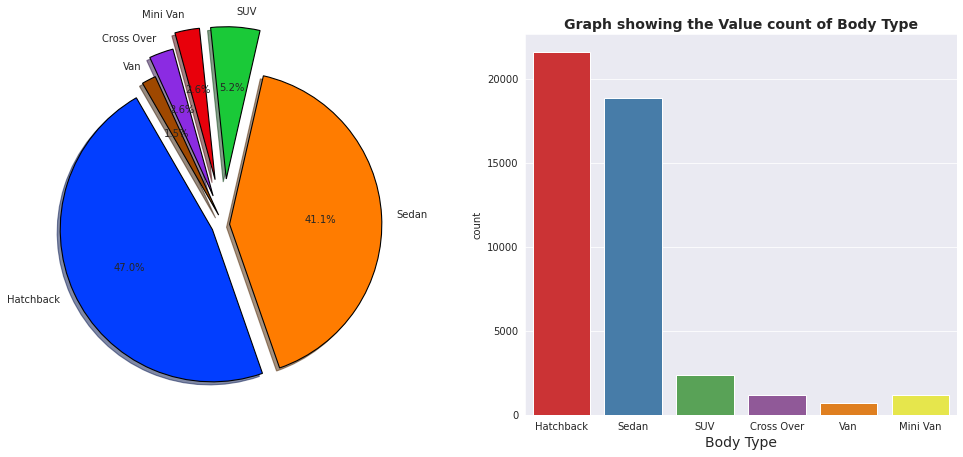

In [43]:
# pie plot showing the Distribution of Body types
fig, axes = plt.subplots(1,2, figsize=(17,7))
colors = sns.color_palette('bright')[0:6]
wp = {'linewidth': 1.1, 'edgecolor': 'black'}
explode = (0.08, 0.04, 0.3, 0.3, 0.2, 0.07)
et = cars['Body Type'].value_counts()
et.plot(kind = 'pie', shadow = True, autopct = '%1.1f%%', colors = colors, wedgeprops = wp, startangle = 120, label = '', 
        explode = explode, fontsize = 10, ax = axes[0])


# count plot showing the numbers of body type
plot = sns.countplot(x = 'Body Type', data = cars, ax = axes[1], palette = "Set1")
plot=plt.setp(plot.get_xticklabels(), rotation=0)
plt.xlabel('Body Type', fontsize = 14)
plt.title('Graph showing the Value count of Body Type', **font)
plt.show()

* Majority of car body are hatchback and sedan.


#### 3.1.5.1 Body Type Vs Price

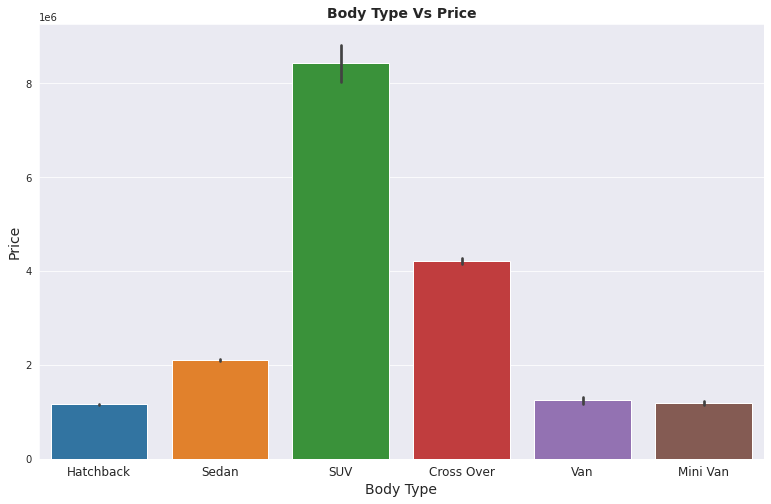

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize = (13, 8))
ax = sns.barplot(x = 'Body Type', y = 'Price', data = cars)
plot=plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=0)
plt.title('Body Type Vs Price', **font)
plt.xlabel('Body Type', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

* Body type - SUV have highest price than others.

### 3.1.6. Category Transmission Type

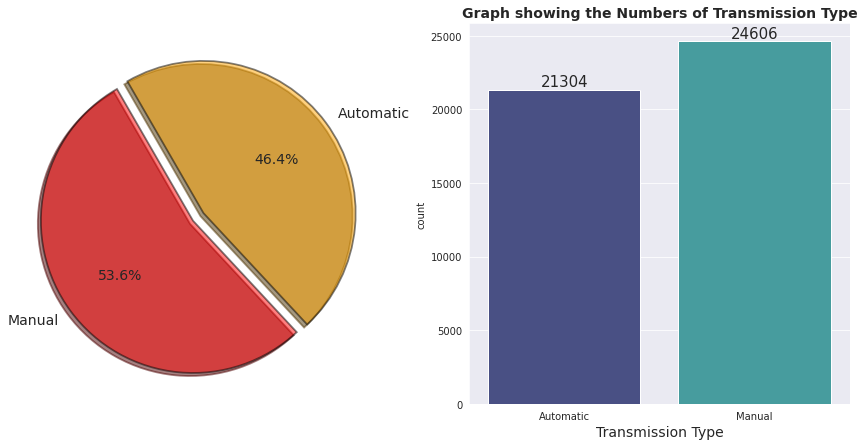

In [45]:
# pie plot showing the Distribution of Transmission Type
fig, axes = plt.subplots(1,2, figsize=(15,7))
colors  = ('red', 'orange')
wp = {'linewidth': 1.8, 'edgecolor': 'black', 'alpha' : 0.5}
explode = (0.08, 0.005)
et = cars['Transmission Type'].value_counts()
et.plot(kind = 'pie', shadow = True, autopct = '%1.1f%%', colors = colors, wedgeprops = wp, startangle = 120, label = '', 
        explode = explode, fontsize = 14, ax = axes[0])


# count plot showing the numbers of Transmission Type
ax = sns.countplot(x = 'Transmission Type', data = cars, ax = axes[1], palette=("mako"))
plt.setp(ax.get_xticklabels(), rotation=0)
plt.xlabel('Transmission Type', fontsize = 14)
plt.title('Graph showing the Numbers of Transmission Type', **font)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.show()

* From above graph, we can see that most of the Transmission types are Automatics.

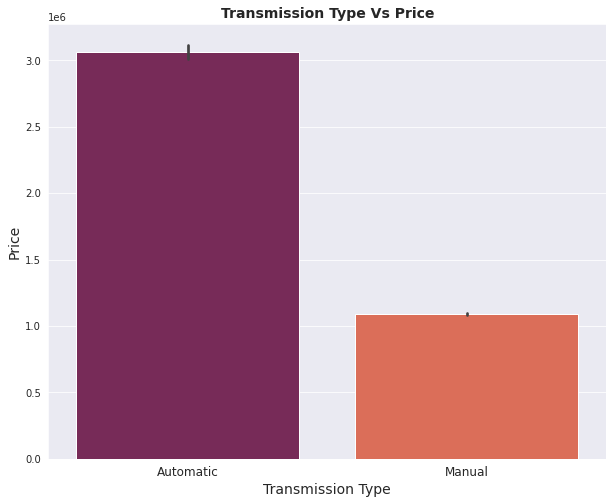

In [46]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = 'Transmission Type', y = 'Price', data = cars, palette = 'rocket')
plot=plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=0)
plt.title('Transmission Type Vs Price', **font)
plt.xlabel('Transmission Type', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

* Cars with Trasnmission type Automatic have high price than Manual cars.

### 3.1.7. Category - Registration Status

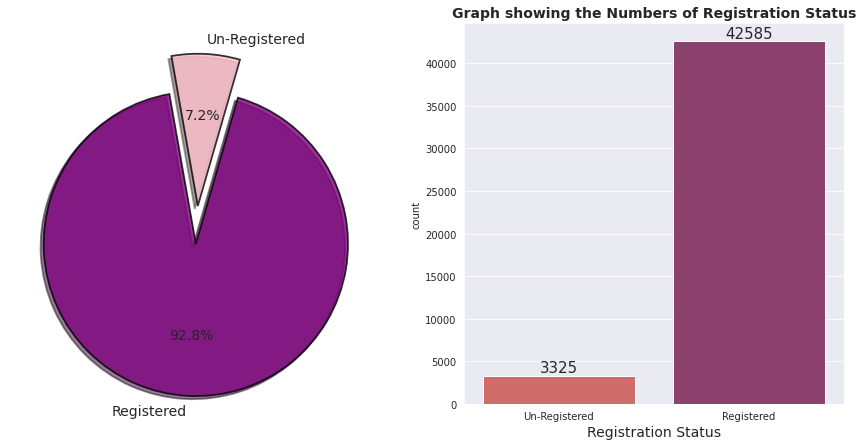

In [47]:
# pie plot showing the Distribution of Registration Status
fig, axes = plt.subplots(1,2, figsize=(15,7))
colors  = ('purple', 'pink')
wp = {'linewidth': 1.8, 'edgecolor': 'black', 'alpha' : 0.8}
explode = (0.2, 0.05)
et = cars['Registration Status'].value_counts()
et.plot(kind = 'pie', shadow = True, autopct = '%1.1f%%', colors = colors, wedgeprops = wp, startangle = 100, label = '', 
        explode = explode, fontsize = 14, ax = axes[0])


# count plot showing the numbers of Transmission Type
ax = sns.countplot(x = 'Registration Status', data = cars, ax = axes[1], palette=("flare"))
plt.setp(ax.get_xticklabels(), rotation=0)
plt.xlabel('Registration Status', fontsize = 14)
plt.title('Graph showing the Numbers of Registration Status', **font)
for bar in ax.patches:
     ax.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

*  Most of the Cars are Registered.

##### 3.1.7.1 Registration Status Vs Price

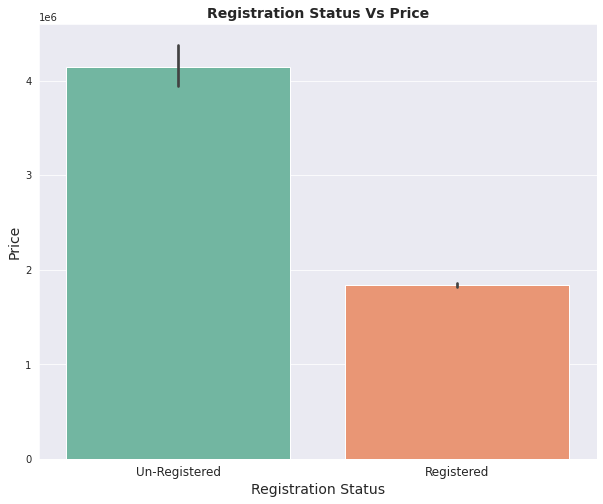

In [48]:
plt.figure(figsize = (10, 8))
ax = sns.barplot(x = 'Registration Status', y = 'Price', data = cars, palette = 'Set2')
plot=plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=0)
plt.title('Registration Status Vs Price', **font)
plt.xlabel('Registration Status', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

* From above graph, we can see that Un-Registered cars have higher price than Registeres cars.

### 3.1.8. Category - Color

In [49]:
nunique_color = cars['Color'].nunique()
print(f'There are total {nunique_color} differents colors of cars in the dataset.')

There are total 24 differents colors of cars in the dataset.


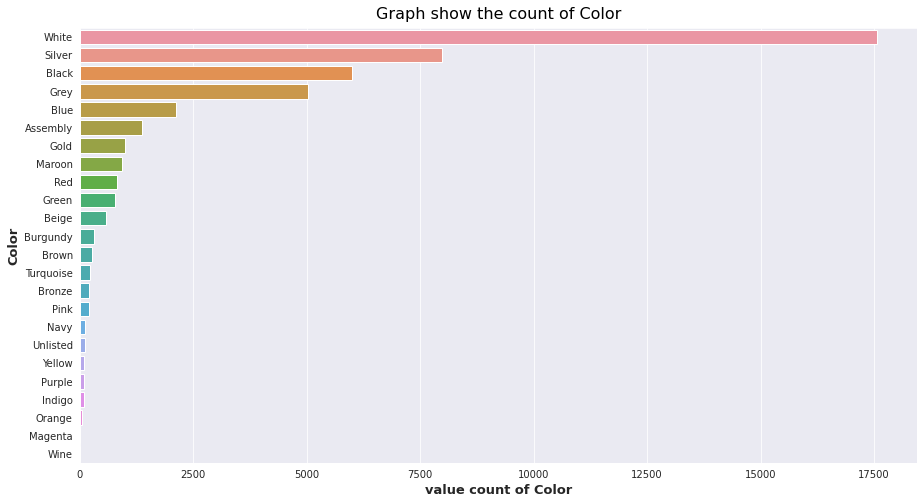

In [50]:
#Plotting Graph
color_count = cars['Color'].value_counts()
color_name = color_count.index
comp_val = color_count.values
plt.figure(figsize = (15, 8))
plot = sns.barplot(y=color_name,x=comp_val)
plot=plt.setp(plot.get_xticklabels(), rotation=0)
plt.xlabel('value count of Color', fontsize = 13, weight ='bold')
plt.ylabel('Color', fontsize = 13, weight ='bold')
plt.title('Graph show the count of Color', **title_font)
plt.show()

* majority of cars color are White.

##### Color Vs Price

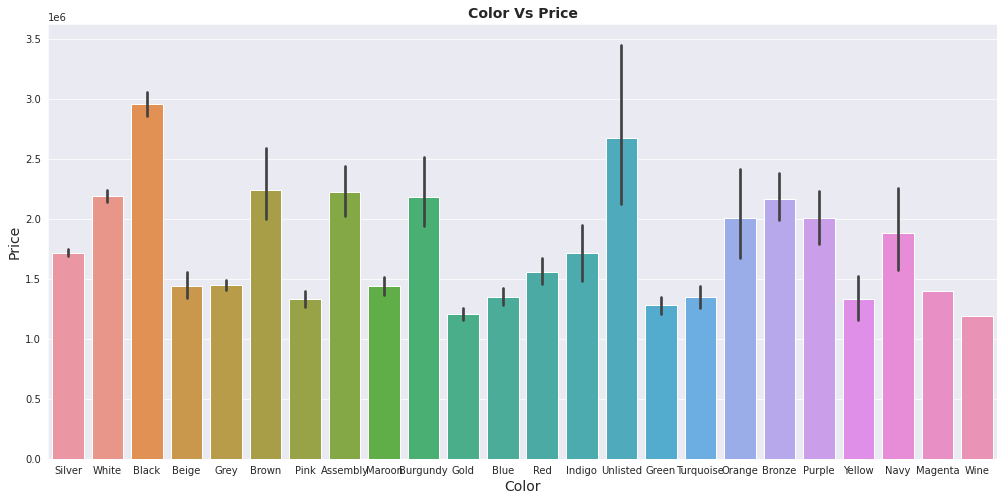

In [51]:
plt.figure(figsize = (17, 8))
sns.barplot(x = 'Color', y = 'Price', data = cars)
plot=plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=0)
plt.title('Color Vs Price', **font)
plt.xlabel('Color', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

#####  Inference
* seems like there's weak corr relation between color & price
* Almost all of colors have same price

### 3.1.9. Category - Location

In [52]:
nunique_loc = cars['Location'].nunique()
print(f'There are total {nunique_loc} differents locations in the dataset.')

There are total 6 differents locations in the dataset.


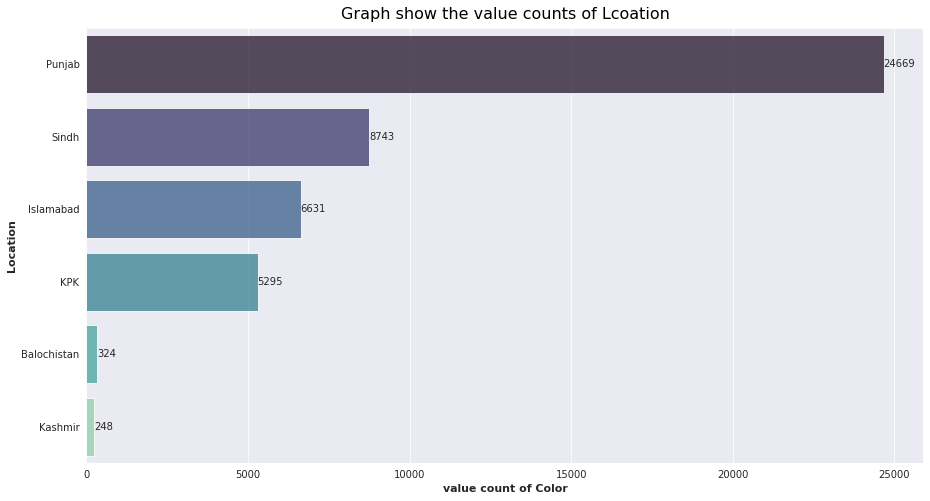

In [53]:
#Plotting Graph
loc_count = cars['Location'].value_counts()
loc_name = loc_count.index
comp_val = loc_count.values
plt.figure(figsize = (15, 8))
ax = sns.barplot(y = loc_name, x = comp_val, palette = 'mako', alpha = 0.8)
plt.xlabel('value count of Color', fontsize = 11, weight ='bold')
plt.ylabel('Location', fontsize = 11, weight ='bold')
plt.title('Graph show the value counts of Lcoation', **title_font)
for bar in ax.containers:
    ax.bar_label(bar, fmt='%.0f', label_type='edge')
plt.show()

##### Location Vs Price

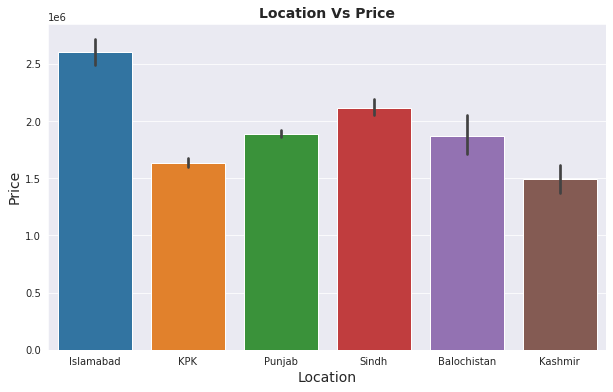

In [54]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Location', y = 'Price', data = cars)
plot=plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=0)
plt.title('Location Vs Price', **font)
plt.xlabel('Location', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

## <font color = blue>3.2 :Feature Analysis on Numerical Column</font>

### 3.2.1. Numerical Variable - Price

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


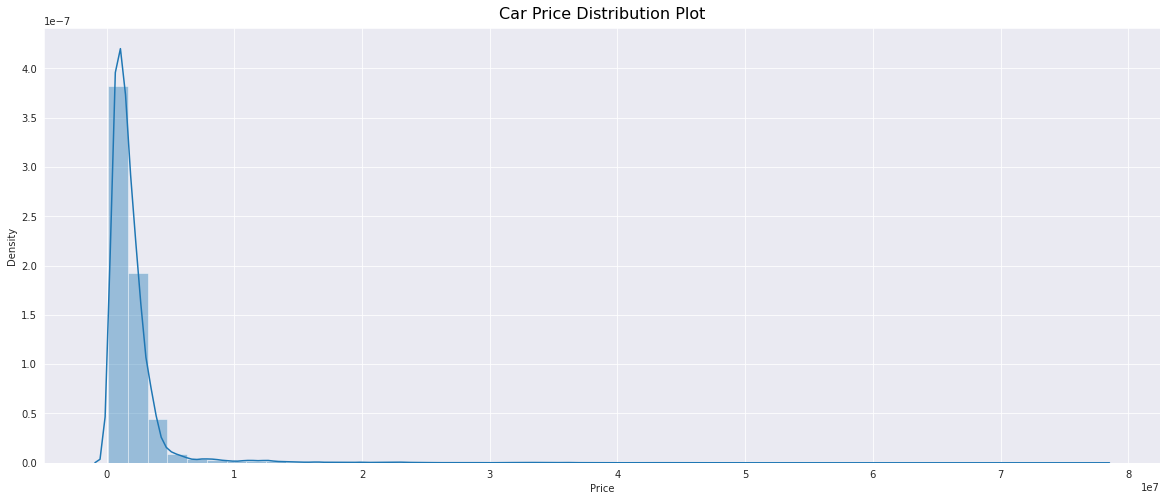

In [55]:
plt.figure(figsize=(20,8))
plt.title('Car Price Distribution Plot', **title_font)
sns.distplot(cars.Price)
plt.show()

### 3.2.2. Numerical Variable - Model Year

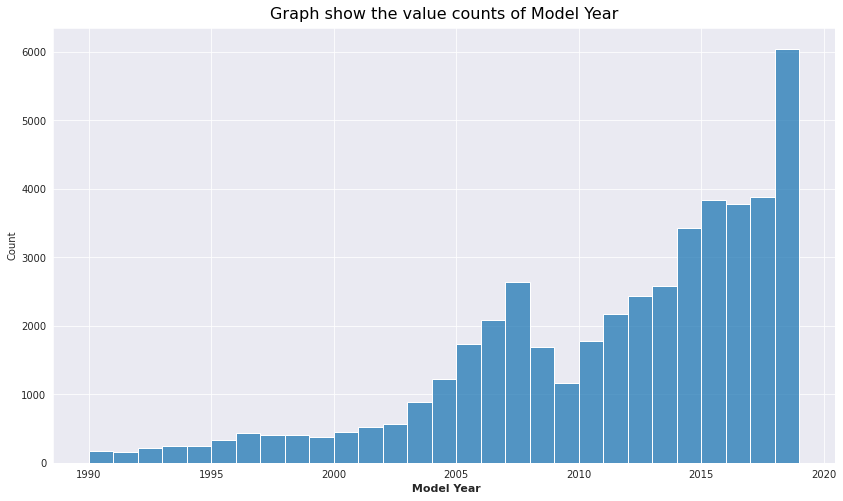

In [56]:
plt.figure(figsize=(14,8))
ax = sns.histplot(x = 'Model Year', data = cars, binwidth = 1)
plt.xlabel(' Model Year', fontsize = 11, weight ='bold')
plt.title('Graph show the value counts of Model Year', **title_font)
plt.show()

* Mdoel year 2019 have most cars in the dataset.

##### 3.2.2.1. Model Year VS Price

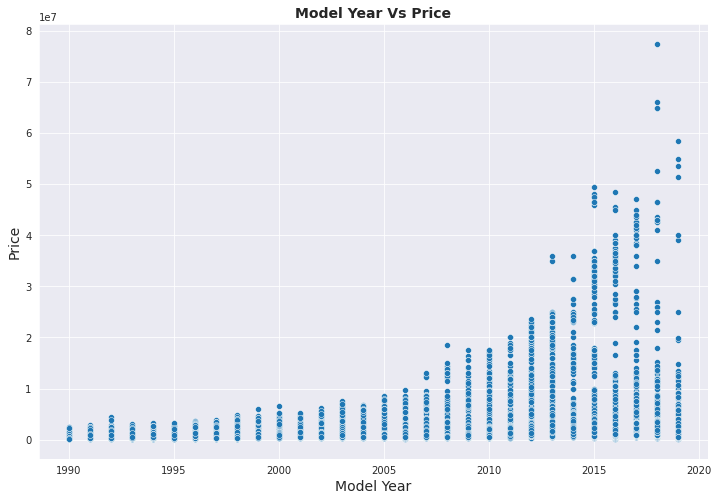

In [57]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Model Year', y = 'Price', data = cars)
plot=plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=0)
plt.title('Model Year Vs Price', **font)
plt.xlabel('Model Year', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()


### 3.2.3. Numerical Variable - Mileage


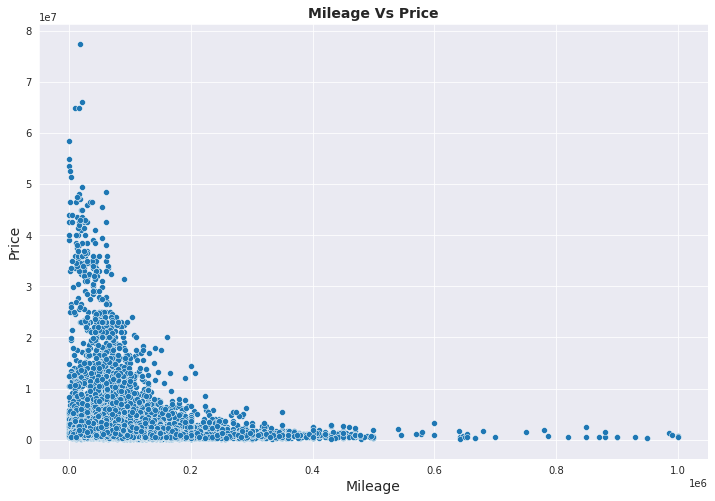

In [58]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'Mileage', y = 'Price', data = cars)
plot=plt.setp(ax.get_xticklabels(), fontsize = 12, rotation=0)
plt.title('Mileage Vs Price', **font)
plt.xlabel('Mileage', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.show()

### 3.2.4. Numerical Variable - Engine Capacity


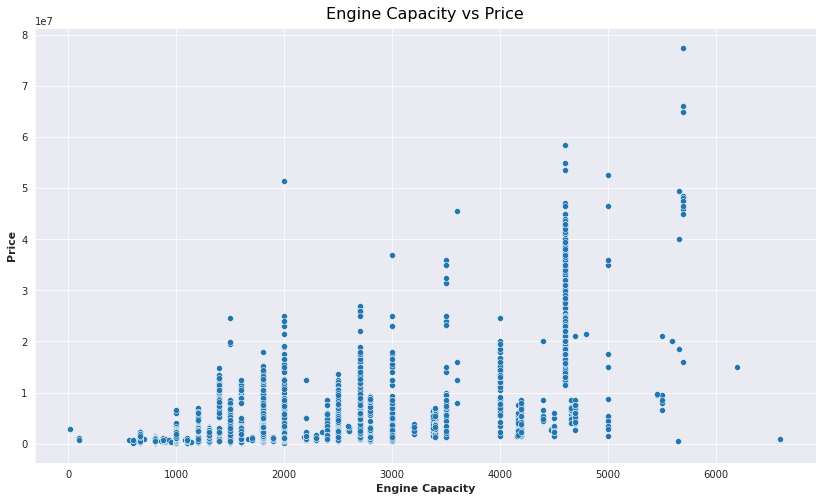

In [59]:
plt.figure(figsize=(14,8))
ax = sns.scatterplot(x = 'Engine Capacity',y = 'Price',data = cars)
plt.xlabel('Engine Capacity', fontsize = 11, weight ='bold')
plt.ylabel('Price', fontsize = 11, weight ='bold')
plt.title('Engine Capacity vs Price', **title_font)
plt.show()

## <font color = red>4. Outliers</font>

### <font color = blue>4.1. Detecting Outliers</font>

In [60]:
def detect_outliers(cars, n, features_list):
    outlier_indices = [] 
    for feature in features_list: 
        Q1 = np.percentile(cars[feature], 25)
        Q3 = np.percentile(cars[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = cars[(cars[feature] < Q1 - outlier_step) | (cars[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(cars, 2, ['Price', 'Model Year', 'Mileage', 'Engine Capacity'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 44 indices:  [737, 3798, 4334, 5019, 12844, 17699, 19179, 19414, 28543, 32786, 41427, 44510, 573, 7406, 7613, 8231, 9014, 9869, 12004, 12496, 12604, 13604, 14643, 16185, 18135, 21056, 21401, 24155, 24422, 26827, 27552, 31125, 35879, 37470, 37519, 38313, 41520, 42925, 44234, 44518, 44618, 44749, 44810, 45833]


In [61]:
cars.iloc[outliers_to_drop, :]

,Company Name,Model Name,Price,Model Year,Location,Mileage,Engine Type,Engine Capacity,Color,Assembly,Body Type,Transmission Type,Registration Status
737,Toyota,Prado,5700000,2004,Punjab,236000,Petrol,3400,White,Imported,SUV,Automatic,Registered
3798,Toyota,Land,4800000,2003,Punjab,266000,Diesel,4200,Blue,Imported,SUV,Automatic,Registered
4334,Toyota,Land,4700000,2003,Punjab,284000,Diesel,4200,Green,Imported,SUV,Automatic,Registered
5019,Toyota,Fortuner,5400000,2014,Punjab,228026,Petrol,2700,Black,Local,SUV,Automatic,Registered
12844,Toyota,Prado,5500000,2004,Islamabad,350000,Diesel,3000,White,Imported,SUV,Automatic,Registered
17699,Toyota,Land,6200000,2007,Islamabad,290000,Diesel,4200,Gold,Imported,SUV,Automatic,Registered
19179,Toyota,Land,5000000,2003,Punjab,286000,Diesel,4200,White,Imported,SUV,Automatic,Registered
19414,Toyota,Land,4800000,2000,Punjab,230000,Petrol,4700,White,Imported,SUV,Automatic,Registered
28543,Toyota,Prado,5450000,2004,Punjab,268946,Petrol,2700,Black,Imported,SUV,Automatic,Registered
32786,Toyota,Land,4700000,2003,Punjab,280000,Diesel,4200,White,Imported,SUV,Automatic,Registered


### 4.2 Droping Outliers From dataset

In [62]:
### Drop outliers and reset index

print("Before: {} rows".format(len(cars)))
cars = cars.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(cars)))

Before: 45910 rows
After: 45866 rows


### List of significant Features after Visual analysis 

* Mileage
* Engine Type
* Model year
* Engine Capacity
* Assembly
* Body Type
* Transmission Type
* Registration Status
* Model name
* Company name

### <font color =green>5. Feature Selcetion</font>

In [63]:
cars.drop(columns = ['Location', 'Color'], inplace = True)

In [64]:
cars.head()

,Company Name,Model Name,Price,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,9869,Petrol,1000,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,11111,Petrol,1300,Local,Sedan,Automatic,Registered
2,Suzuki,Alto,1530000,2019,17500,Petrol,660,Local,Hatchback,Automatic,Un-Registered
3,Suzuki,Alto,1650000,2019,9600,Petrol,660,Local,Hatchback,Manual,Registered
4,Toyota,Corolla,1435000,2010,120000,Petrol,1300,Local,Sedan,Manual,Registered


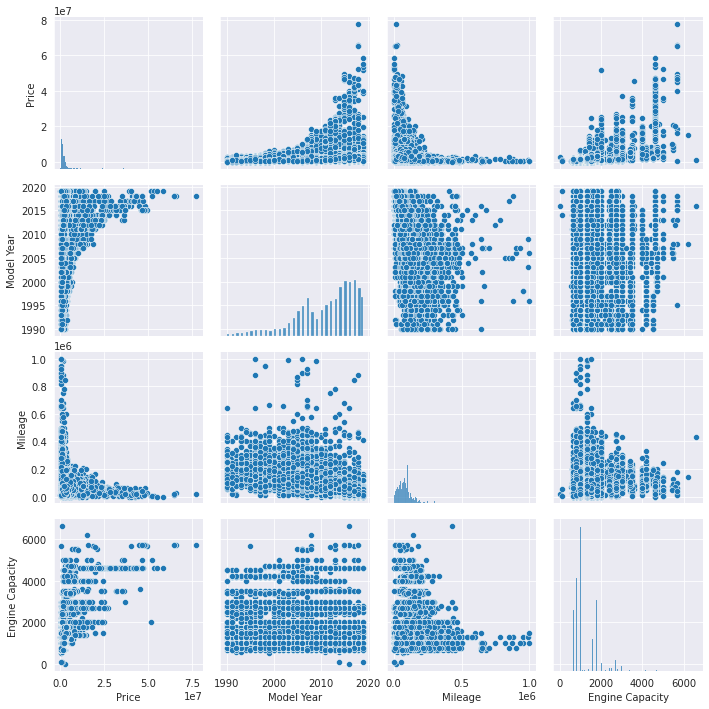

In [65]:
sns.pairplot(cars)

In [66]:
# backup data
cars_2 = cars.copy()

In [67]:
cars.head(2)

,Company Name,Model Name,Price,Model Year,Mileage,Engine Type,Engine Capacity,Assembly,Body Type,Transmission Type,Registration Status
0,Toyota,Vitz,2385000,2017,9869,Petrol,1000,Imported,Hatchback,Automatic,Un-Registered
1,Toyota,Corolla,111000,2019,11111,Petrol,1300,Local,Sedan,Automatic,Registered


### <font color = green>6. Dummy Variables</font>

In [68]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars

cars = dummies('Company Name',cars)
cars = dummies('Model Name',cars)
cars = dummies('Model Year',cars)
cars = dummies('Engine Type',cars)
cars = dummies('Assembly',cars)
cars = dummies('Body Type',cars)
cars = dummies('Transmission Type',cars)
cars = dummies('Registration Status',cars)

In [69]:
cars.head(3)

,Price,Mileage,Engine Capacity,Audi,BMW,Chery,Chevrolet,DFSK,Daewoo,Daihatsu,...,Hybrid,Petrol,Local,Hatchback,Mini Van,SUV,Sedan,Van,Manual,Un-Registered
0,2385000,9869,1000,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,111000,11111,1300,0,0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,1530000,17500,660,0,0,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,1


In [70]:
cars.shape

(45866, 264)

### <font color = green>7. Feature Scaling</font>

In [71]:
scaler = MinMaxScaler()
num_vars = ['Mileage', 'Engine Capacity']
cars[num_vars] = scaler.fit_transform(cars[num_vars])

### Noramlizing Price column

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

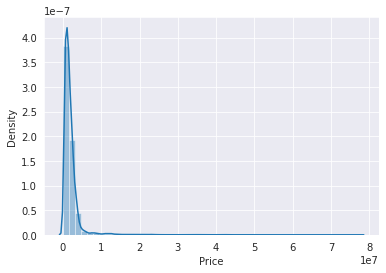

In [72]:
sns.distplot(cars['Price'])

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

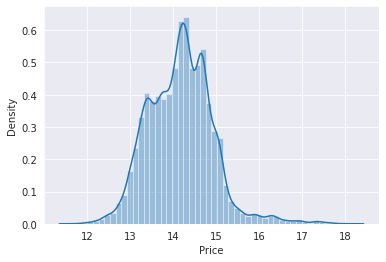

In [73]:
#After log trasnformation
sns.distplot(np.log(cars['Price']))

### <font color = green>8. Train-Test Split</font>

In [74]:
X = cars.drop(columns=['Price'])
Y = np.log(cars['Price'])

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.15,random_state=2)

In [76]:
x_train.shape[0]

38986

In [77]:
x_test.shape[0]

6880

### <font color = green>9. Building Model

### 9.1 RandomForest Regressor

In [78]:
rfr = RandomForestRegressor(n_estimators=300,
                              random_state=1,
                              max_samples=0.8,
                              max_features=0.75,
                              max_depth=20)
rfr.fit(x_train,y_train)

y_pred = rfr.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


R2 score 0.9559746135337609
MAE 0.09853511828671387


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


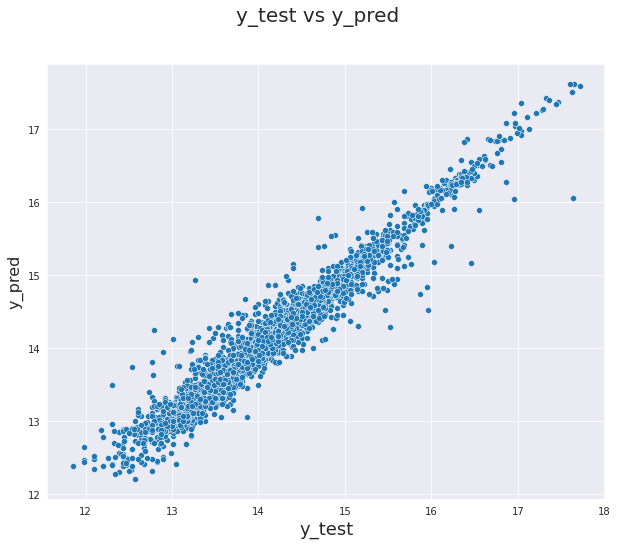

In [79]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)
plt.show()  

### 9.2 DecisionTree Regressor

In [80]:
dt = DecisionTreeRegressor(max_depth=8)

dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


R2 score 0.8622780862468434
MAE 0.19277929896257248


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


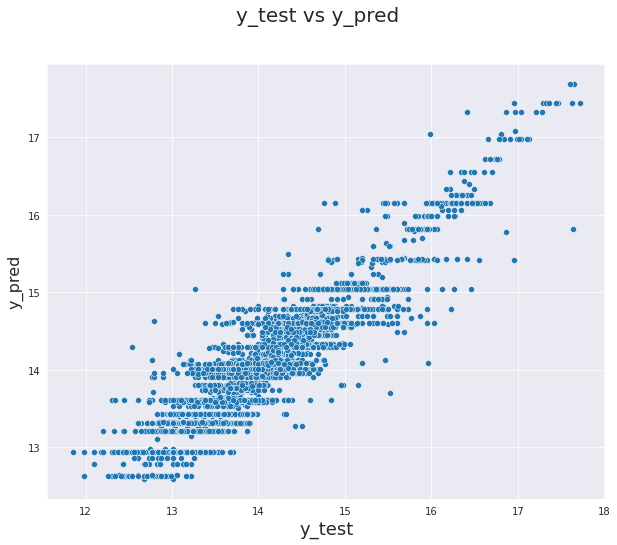

In [81]:
fig = plt.figure(figsize = (10,8))
sns.scatterplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)
plt.show()  

### 9.3 GradientBoost Regressor

In [82]:
gb = GradientBoostingRegressor(n_estimators=500)


gb.fit(x_train,y_train)

y_pred = gb.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


R2 score 0.9540558283296454
MAE 0.10844872221707419


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


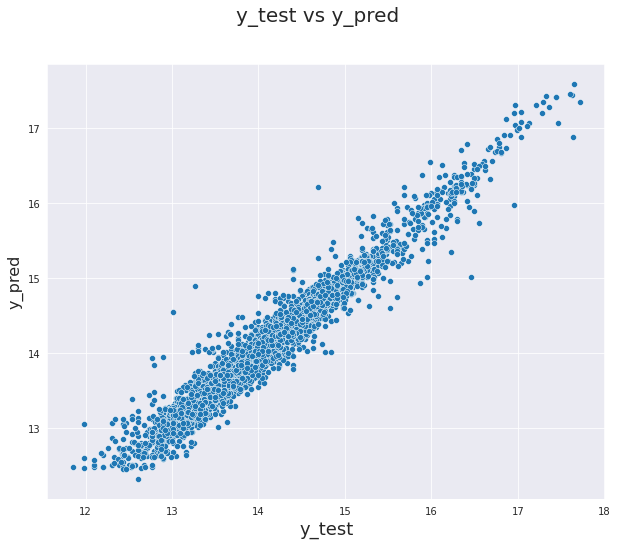

In [83]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (10,8))
sns.scatterplot(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20) 
plt.xlabel('y_test', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)
plt.show()   

### <font color = green>10. Results
* We applied three models RandomForest Regressor, Decision Tree Regressor,and GradientBoosting Regressor
* As we can see random forest performing best (with accuracy ~ 0.95)

This is my first notebook, hopefully you like it and feel free to give your suggestion through comment it wil help me improve..
aslo an upvote motivate me to work more hard... Thanku :)